In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2422, 0.1504, 0.6603],[0.2444, 0.1534, 0.6728],[0.2464, 0.1569, 0.6847],[0.2484, 0.1607, 0.6961],[0.2503, 0.1648, 0.7071],[0.2522, 0.1689, 0.7179],[0.254, 0.1732, 0.7286],[0.2558, 0.1773, 0.7393],[0.2576, 0.1814, 0.7501],[0.2594, 0.1854, 0.761],[0.2611, 0.1893, 0.7719],[0.2628, 0.1932, 0.7828],[0.2645, 0.1972, 0.7937],[0.2661, 0.2011, 0.8043],[0.2676, 0.2052, 0.8148],[0.2691, 0.2094, 0.8249],[0.2704, 0.2138, 0.8346],[0.2717, 0.2184, 0.8439],[0.2729, 0.2231, 0.8528],[0.274, 0.228, 0.8612],[0.2749, 0.233, 0.8692],[0.2758, 0.2382, 0.8767],[0.2766, 0.2435, 0.884],[0.2774, 0.2489, 0.8908],[0.2781, 0.2543, 0.8973],[0.2788, 0.2598, 0.9035],[0.2794, 0.2653, 0.9094],[0.2798, 0.2708, 0.915],[0.2802, 0.2764, 0.9204],[0.2806, 0.2819, 0.9255],[0.2809, 0.2875, 0.9305],[0.2811, 0.293, 0.9352],[0.2813, 0.2985, 0.9397],[0.2814, 0.304, 0.9441],[0.2814, 0.3095, 0.9483],[0.2813, 0.315, 0.9524],[0.2811, 0.3204, 0.9563],[0.2809, 0.3259, 0.96],[0.2807, 0.3313, 0.9636],[0.2803, 0.3367, 0.967],[0.2798, 0.3421, 0.9702],[0.2791, 0.3475, 0.9733],[0.2784, 0.3529, 0.9763],[0.2776, 0.3583, 0.9791],[0.2766, 0.3638, 0.9817],[0.2754, 0.3693, 0.984],[0.2741, 0.3748, 0.9862],[0.2726, 0.3804, 0.9881],[0.271, 0.386, 0.9898],[0.2691, 0.3916, 0.9912],[0.267, 0.3973, 0.9924],[0.2647, 0.403, 0.9935],[0.2621, 0.4088, 0.9946],[0.2591, 0.4145, 0.9955],[0.2556, 0.4203, 0.9965],[0.2517, 0.4261, 0.9974],[0.2473, 0.4319, 0.9983],[0.2424, 0.4378, 0.9991],[0.2369, 0.4437, 0.9996],[0.2311, 0.4497, 0.9995],[0.225, 0.4559, 0.9985],[0.2189, 0.462, 0.9968],[0.2128, 0.4682, 0.9948],[0.2066, 0.4743, 0.9926],[0.2006, 0.4803, 0.9906],[0.195, 0.4861, 0.9887],[0.1903, 0.4919, 0.9867],[0.1869, 0.4975, 0.9844],[0.1847, 0.503, 0.9819],[0.1831, 0.5084, 0.9793],[0.1818, 0.5138, 0.9766],[0.1806, 0.5191, 0.9738],[0.1795, 0.5244, 0.9709],[0.1785, 0.5296, 0.9677],[0.1778, 0.5349, 0.9641],[0.1773, 0.5401, 0.9602],[0.1768, 0.5452, 0.956],[0.1764, 0.5504, 0.9516],[0.1755, 0.5554, 0.9473],[0.174, 0.5605, 0.9432],[0.1716, 0.5655, 0.9393],[0.1686, 0.5705, 0.9357],[0.1649, 0.5755, 0.9323],[0.161, 0.5805, 0.9289],[0.1573, 0.5854, 0.9254],[0.154, 0.5902, 0.9218],[0.1513, 0.595, 0.9182],[0.1492, 0.5997, 0.9147],[0.1475, 0.6043, 0.9113],[0.1461, 0.6089, 0.908],[0.1446, 0.6135, 0.905],[0.1429, 0.618, 0.9022],[0.1408, 0.6226, 0.8998],[0.1383, 0.6272, 0.8975],[0.1354, 0.6317, 0.8953],[0.1321, 0.6363, 0.8932],[0.1288, 0.6408, 0.891],[0.1253, 0.6453, 0.8887],[0.1219, 0.6497, 0.8862],[0.1185, 0.6541, 0.8834],[0.1152, 0.6584, 0.8804],[0.1119, 0.6627, 0.877],[0.1085, 0.6669, 0.8734],[0.1048, 0.671, 0.8695],[0.1009, 0.675, 0.8653],[0.0964, 0.6789, 0.8609],[0.0914, 0.6828, 0.8562],[0.0855, 0.6865, 0.8513],[0.0789, 0.6902, 0.8462],[0.0713, 0.6938, 0.8409],[0.0628, 0.6972, 0.8355],[0.0535, 0.7006, 0.8299],[0.0433, 0.7039, 0.8242],[0.0328, 0.7071, 0.8183],[0.0234, 0.7103, 0.8124],[0.0155, 0.7133, 0.8064],[0.0091, 0.7163, 0.8003],[0.0046, 0.7192, 0.7941],[0.0019, 0.722, 0.7878],[0.0009, 0.7248, 0.7815],[0.0018, 0.7275, 0.7752],[0.0046, 0.7301, 0.7688],[0.0094, 0.7327, 0.7623],[0.0162, 0.7352, 0.7558],[0.0253, 0.7376, 0.7492],[0.0369, 0.74, 0.7426],[0.0504, 0.7423, 0.7359],[0.0638, 0.7446, 0.7292],[0.077, 0.7468, 0.7224],[0.0899, 0.7489, 0.7156],[0.1023, 0.751, 0.7088],[0.1141, 0.7531, 0.7019],[0.1252, 0.7552, 0.695],[0.1354, 0.7572, 0.6881],[0.1448, 0.7593, 0.6812],[0.1532, 0.7614, 0.6741],[0.1609, 0.7635, 0.6671],[0.1678, 0.7656, 0.6599],[0.1741, 0.7678, 0.6527],[0.1799, 0.7699, 0.6454],[0.1853, 0.7721, 0.6379],[0.1905, 0.7743, 0.6303],[0.1954, 0.7765, 0.6225],[0.2003, 0.7787, 0.6146],[0.2061, 0.7808, 0.6065],[0.2118, 0.7828, 0.5983],[0.2178, 0.7849, 0.5899],[0.2244, 0.7869, 0.5813],[0.2318, 0.7887, 0.5725],[0.2401, 0.7905, 0.5636],[0.2491, 0.7922, 0.5546],[0.2589, 0.7937, 0.5454],[0.2695, 0.7951, 0.536],[0.2809, 0.7964, 0.5266],[0.2929, 0.7975, 0.517],[0.3052, 0.7985, 0.5074],[0.3176, 0.7994, 0.4975],[0.3301, 0.8002, 0.4876],[0.3424, 0.8009, 0.4774],[0.3548, 0.8016, 0.4669],[0.3671, 0.8021, 0.4563],[0.3795, 0.8026, 0.4454],[0.3921, 0.8029, 0.4344],[0.405, 0.8031, 0.4233],[0.4184, 0.803, 0.4122],[0.4322, 0.8028, 0.4013],[0.4463, 0.8024, 0.3904],[0.4608, 0.8018, 0.3797],[0.4753, 0.8011, 0.3691],[0.4899, 0.8002, 0.3586],[0.5044, 0.7993, 0.348],[0.5187, 0.7982, 0.3374],[0.5329, 0.797, 0.3267],[0.547, 0.7957, 0.3159],[0.5609, 0.7943, 0.305],[0.5748, 0.7929, 0.2941],[0.5886, 0.7913, 0.2833],[0.6024, 0.7896, 0.2726],[0.6161, 0.7878, 0.2622],[0.6297, 0.7859, 0.2521],[0.6433, 0.7839, 0.2423],[0.6567, 0.7818, 0.2329],[0.6701, 0.7796, 0.2239],[0.6833, 0.7773, 0.2155],[0.6963, 0.775, 0.2075],[0.7091, 0.7727, 0.1998],[0.7218, 0.7703, 0.1924],[0.7344, 0.7679, 0.1852],[0.7468, 0.7654, 0.1782],[0.759, 0.7629, 0.1717],[0.771, 0.7604, 0.1658],[0.7829, 0.7579, 0.1608],[0.7945, 0.7554, 0.157],[0.806, 0.7529, 0.1546],[0.8172, 0.7505, 0.1535],[0.8281, 0.7481, 0.1536],[0.8389, 0.7457, 0.1546],[0.8495, 0.7435, 0.1564],[0.86, 0.7413, 0.1587],[0.8703, 0.7392, 0.1615],[0.8804, 0.7372, 0.165],[0.8903, 0.7353, 0.1695],[0.9, 0.7336, 0.1749],[0.9093, 0.7321, 0.1815],[0.9184, 0.7308, 0.189],[0.9272, 0.7298, 0.1973],[0.9357, 0.729, 0.2061],[0.944, 0.7285, 0.2151],[0.9523, 0.7284, 0.2237],[0.9606, 0.7285, 0.2312],[0.9689, 0.7292, 0.2373],[0.977, 0.7304, 0.2418],[0.9842, 0.733, 0.2446],[0.99, 0.7365, 0.2429],[0.9946, 0.7407, 0.2394],[0.9966, 0.7458, 0.2351],[0.9971, 0.7513, 0.2309],[0.9972, 0.7569, 0.2267],[0.9971, 0.7626, 0.2224],[0.9969, 0.7683, 0.2181],[0.9966, 0.774, 0.2138],[0.9962, 0.7798, 0.2095],[0.9957, 0.7856, 0.2053],[0.9949, 0.7915, 0.2012],[0.9938, 0.7974, 0.1974],[0.9923, 0.8034, 0.1939],[0.9906, 0.8095, 0.1906],[0.9885, 0.8156, 0.1875],[0.9861, 0.8218, 0.1846],[0.9835, 0.828, 0.1817],[0.9807, 0.8342, 0.1787],[0.9778, 0.8404, 0.1757],[0.9748, 0.8467, 0.1726],[0.972, 0.8529, 0.1695],[0.9694, 0.8591, 0.1665],[0.9671, 0.8654, 0.1636],[0.9651, 0.8716, 0.1608],[0.9634, 0.8778, 0.1582],[0.9619, 0.884, 0.1557],[0.9608, 0.8902, 0.1532],[0.9601, 0.8963, 0.1507],[0.9596, 0.9023, 0.148],[0.9595, 0.9084, 0.145],[0.9597, 0.9143, 0.1418],[0.9601, 0.9203, 0.1382],[0.9608, 0.9262, 0.1344],[0.9618, 0.932, 0.1304],[0.9629, 0.9379, 0.1261],[0.9642, 0.9437, 0.1216],[0.9657, 0.9494, 0.1168],[0.9674, 0.9552, 0.1116],[0.9692, 0.9609, 0.1061],[0.9711, 0.9667, 0.1001],[0.973, 0.9724, 0.0938],[0.9749, 0.9782, 0.0872],[0.9769, 0.9839, 0.0805]]
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
#test_cm = parula_map
#plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',cmap=parula_map)

In [8]:
data_dir='/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/Glorys/cmems_mod_glo_phy_myint_0.083deg_P1M-m_202311/'
files=[]
for iy in range(2022,2024):
    for im in range(1,13):
        files.append(data_dir+"mercatorglorys12v1_gl12_mean_%02d%02d.nc"%(iy,im))

In [9]:
files

['/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/Glorys/cmems_mod_glo_phy_myint_0.083deg_P1M-m_202311/mercatorglorys12v1_gl12_mean_202201.nc',
 '/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/Glorys/cmems_mod_glo_phy_myint_0.083deg_P1M-m_202311/mercatorglorys12v1_gl12_mean_202202.nc',
 '/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/Glorys/cmems_mod_glo_phy_myint_0.083deg_P1M-m_202311/mercatorglorys12v1_gl12_mean_202203.nc',
 '/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/Glorys/cmems_mod_glo_phy_myint_0.083deg_P1M-m_202311/mercatorglorys12v1_gl12_mean_202204.nc',
 '/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/Glorys/cmems_mod_glo_phy_myint_0.083deg_P1M-m_202311/mercatorglorys12v1_gl12_mean_202205.nc',
 '/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/Glorys/cmems_mod_glo_phy_myint_0.083deg_P1M-m_202311/mercatorglorys12v1_gl12_mean_202206.nc',
 '/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/Glorys/cmems_mod_glo_phy_myint_0.083deg_P1M-m_202311/mercatorglor

In [10]:
data = xr.open_mfdataset(files)

In [11]:
data

<xarray.Dataset> Size: 350GB
Dimensions:    (time: 24, latitude: 2041, longitude: 4320, depth: 50)
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 192B 2022-01-16T12:00:00 ... 2023-12-16T...
Data variables:
    bottomT    (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    mlotst     (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    zos        (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    sithick    (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    siconc     (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    usi        (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    vsi        (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float64 85GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float64 85GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float64 85GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float64 85GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

## Selecciono datos

In [140]:
lons=(-25,-10)

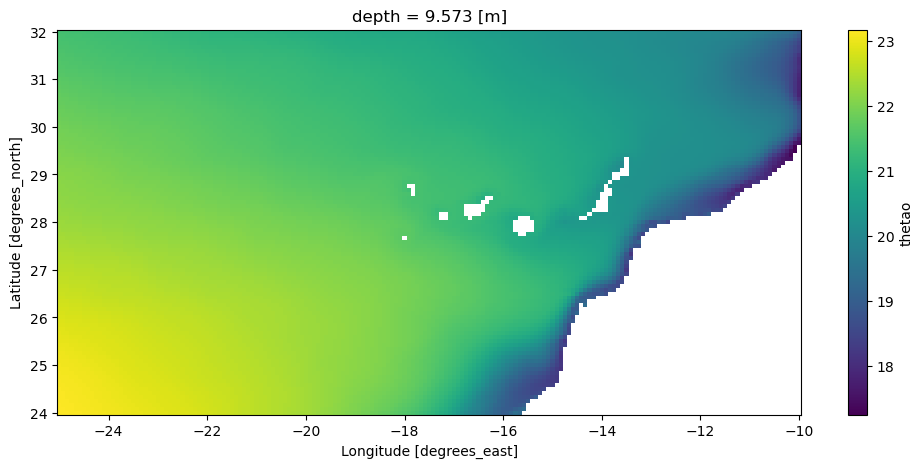

In [130]:
data.thetao.mean('time').sel(longitude=slice(-25,-10)).sel(latitude=slice(24,32)).sel(depth=10,method='nearest').plot()

In [167]:
#Estacion 15
est=15
slon=-15.50
slat=29.16

In [166]:
#Estacion 5
est=5
slon=-12.87
slat=28.62

In [162]:
DS=data.sel(longitude=slon,method='nearest').sel(latitude=slat,method='nearest').sel(depth=slice(0,550))

In [168]:
def cicloAnual(var,rango,rangot,rangoc,nombrevar,est):

    fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
  
    CS = ax.contourf(np.arange(1,13,1),DS.depth,DS[var].transpose(),levels=rango,cmap=parula_map,extend='both')
    CS2= ax.contour(np.arange(1,13,1),DS.depth,DS[var].transpose(),levels=rangot, colors='k')

    ax.set_ylim(0,450)
    ax.clabel(CS2, fmt='%2.1f', colors='w', fontsize=10)
    ax.set_title('Ciclo anual '+ nombrevar)
    ax.set_xlabel('Mes')
    ax.set_ylabel('Profundidad')

    ax.set_xticks([1,2,4,6,8,10,12], ['','Febrero', 'Abril','Junio','Agosto','Octubre','Diciembre']) 
    ax.set_yticks(np.arange(0,500,50)) 
    ax.invert_yaxis()

    # Make a colorbar
    cbar = fig.colorbar(CS)
    cbar.ax.set_ylabel(nombrevar)
    cbar.set_ticks(rangoc)

    ax.grid(linestyle=':', linewidth=.9);
    fig.savefig('CicloAnual'+ nombrevar+str(est)+'.png')

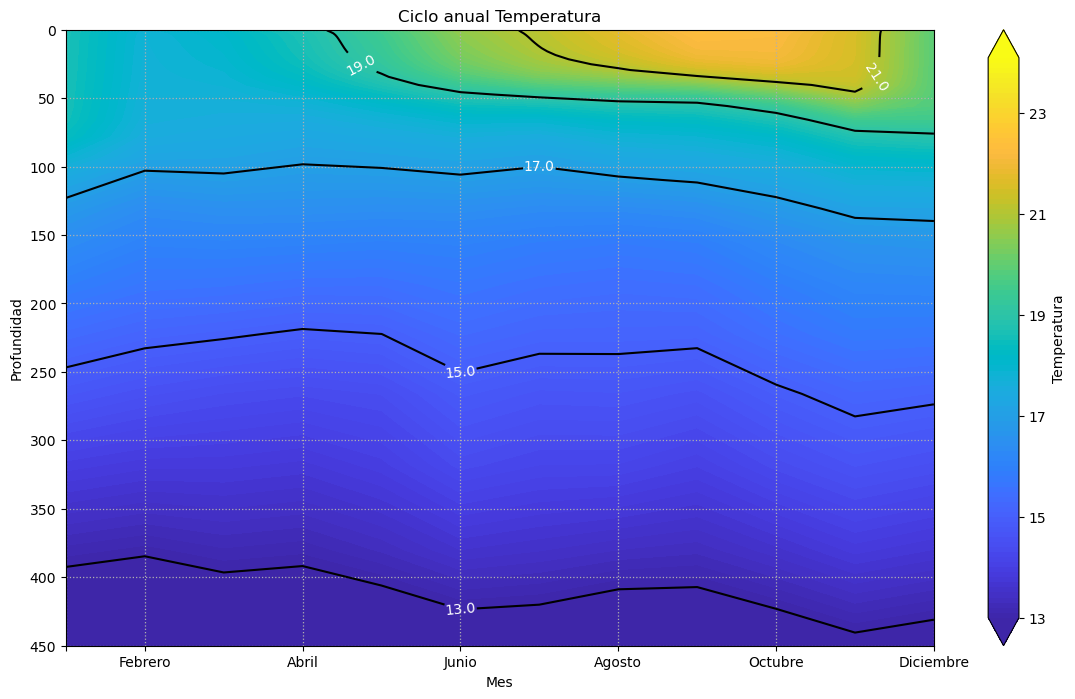

In [169]:
var='thetao'
rango=np.arange(13,24.1,0.1)
rangot=[13,15,17,19,21,23]
rangoc=np.arange(13,24,2)
nombrevar='Temperatura'
cicloAnual(var,rango,rangot,rangoc,nombrevar,est)

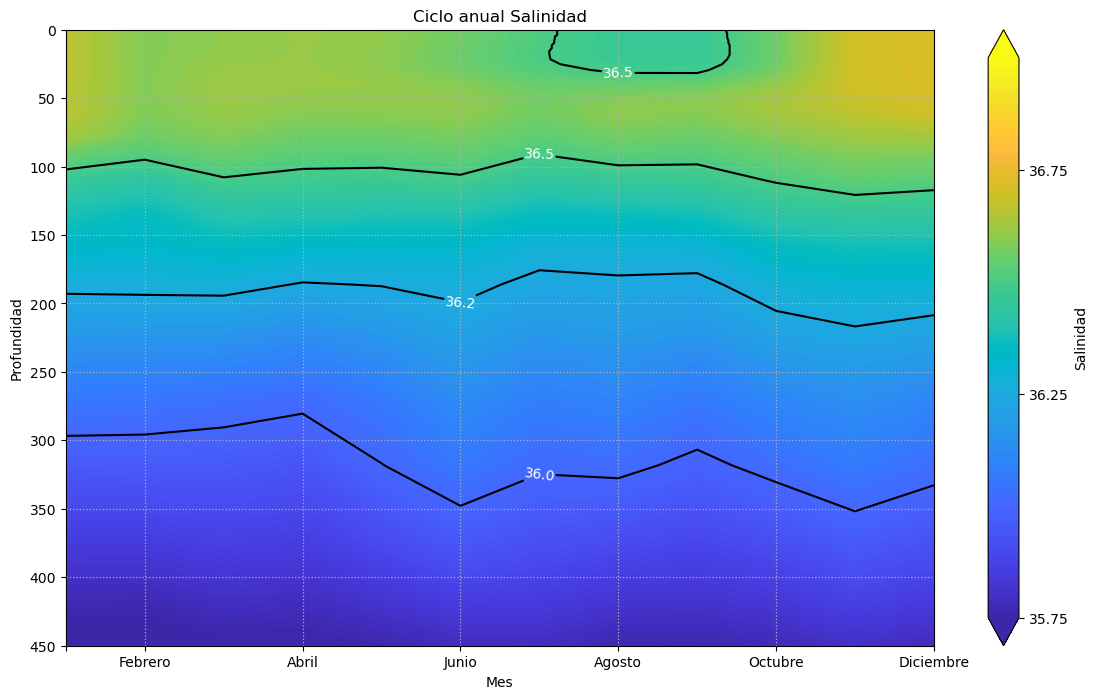

In [170]:
var='so'
rango=np.arange(35.75,37.01,0.01)
rangot=[36,36.25,36.5,36.75,37]
rangoc=np.arange(35.75,37,0.5)
nombrevar='Salinidad'
cicloAnual(var,rango,rangot,rangoc,nombrevar,est)

In [8]:
ISAS

<xarray.Dataset> Size: 268GB
Dimensions:      (lon: 720, lat: 545, depth: 187, time: 228)
Coordinates:
  * lon          (lon) float32 3kB -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * lat          (lat) float32 2kB -77.01 -76.9 -76.78 ... 89.49 89.69 89.9
  * depth        (depth) float32 748B 1.0 3.0 5.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time         (time) datetime64[ns] 2kB 2002-01-15 2002-02-15 ... 2020-12-15
Data variables:
    temperature  (time, depth, lat, lon) float64 134GB dask.array<chunksize=(1, 187, 545, 720), meta=np.ndarray>
    salinity     (time, depth, lat, lon) float64 134GB dask.array<chunksize=(1, 187, 545, 720), meta=np.ndarray>
Attributes: (12/20)
    Conventions:            CF-1.4
    title:                  Monthly analysis
    history:                20210706T111131L : Creation
    institution:            LOPS/IFREMER/IUEM
    project_name:           ISASLOPS
    analysis_name:          ISAS20_ARGO_
    ...                     ...
    start_date:             2002-01-15
    stop_date:              2002-01-15
    creation_date:          20210706T111131L
    reference_date:         1950-01-01T00:00:00Z
    references:             Gaillard et al., JCLIM 2016, Doi:10.1175/JCLI-D-1...
    comment:                V8.0 T and S fields

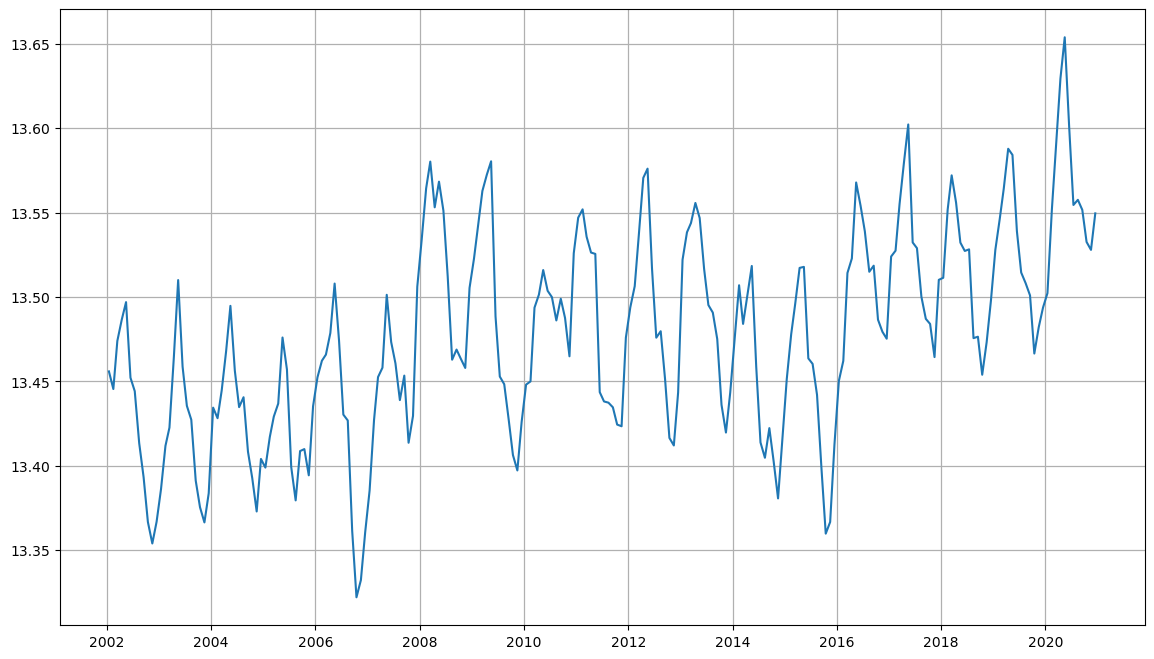

In [9]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(ISAS.time,
        ISAS.temperature.sel(lat=slice( 0, 60)).mean(dim='lat').mean(dim='lon').sel(depth=200,method="nearest"),
        label = '200')
ax.grid(linestyle='-', linewidth=.9);

In [59]:
ISAS.sel(lon=slice(24, 26)).to_netcdf('EN_Global_Jan2002_Dic2020_24N.nc')